# **Chapter 17: Interpolation**


---



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### **17.1 Interpolation Problem Statement**

Assume we have a set of data with values $y_i$ dependant upon the values of $x_i$. We want to find an estimation function $\hat{y}(x)$ such that $\hat{y}(x_i)=y_i$. 

If we are given a new $x$ value, $x_*$; we can interpolate its $y$ value using $\hat{y}(x_*)$. And $\hat{y}(x)$ is called the interpolation equation.

Below is an example of the interpolation problem statement. With $x_*$ being our unknown value.

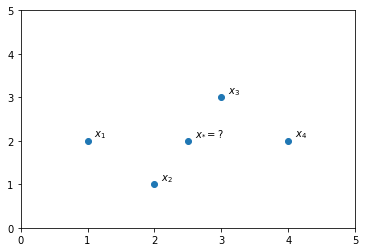

In [2]:
x = [1, 2, 2.5, 3, 4]
y = [2, 1, 2, 3, 2]
n = ["$x_{1}$", "$x_{2}$", "$x_{*}=?$", "$x_{3}$", "$x_{4}$"]

plt.scatter(x, y)
plt.axis([0,5, 0, 5])
for i, txt in enumerate(n):
  plt.annotate(txt, (x[i] + 0.1, y[i] + 0.1))
plt.show()

### **17.2 Linear Interpolation**

In linear interpolation the point is assumed to lie on the line joining the nearest points to the left and right of it. Assuming $x$ is increasing, then for point $x$: $$\hat{y}(x)=y_i+\frac{(y_{i+1}-y_i)(x-x_i)}{x_{i+1}-x_i}$$

The figure below illustrates this using the 'interp1d' function.

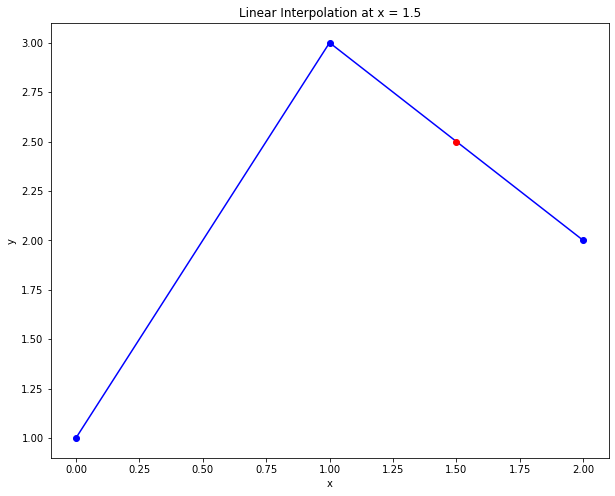

In [3]:
from scipy.interpolate import interp1d

x = [0, 1, 2]
y = [1, 3, 2]
f = interp1d(x, y)
y_hat = f(1.5)

plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### **17.3 Cubic Spline Interpolation**

With cubic spline interpolation, the interpolating function is a set of piecewise cubic functions. Specifically, we assume that successive points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ are joined by a cubic polynomial $S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$. For n points, there are $n−1$ cubic functions to find, and each cubic function requires four coefficients. Therefore we have a total of $4(n−1)$ unknowns, and so we need $4(n−1)$ independent equations to find all the coefficients.

First, we know that the data points are where each equation intersecs, therefore: $$S_i=y_i, i=1,...,n-1$$ $$S_{i+1}=y_{i+1}, i=1,...,n-1$$
This gives us $2(n-1)$ equations.

We want each equation to join together at the known data points as smoothly as possible, so we set a constraint that they have continuous first and second derivatives at the known data points. So: $$S_i'(x_{i+1})=S_{i+1}'(x_{i+1}), i=1,...,n-2$$ $$S_i''(x_{i+1})=S_{i+1}''(x_{i+1}), i=1,...,n-2$$

This gives us $2(n-2)$ equations. We have 2 more to go. Commonly, it is assumed the second derivatives are zero at the endpoints, namely: $$S_1''(x_1)=0$$ $$S_{n-1}''(x_n)=0$$

Scipy has a CubicSpline function to help us with the calculations. 

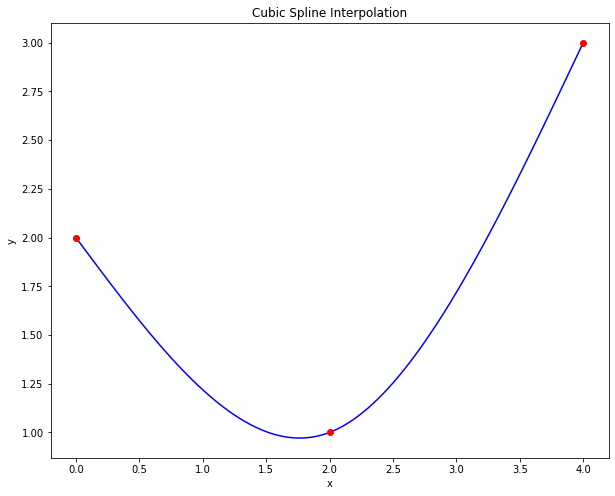

In [4]:
from scipy.interpolate import CubicSpline

x = [0, 2, 4]
y = [2, 1, 3]

#bc_type = 'natural' adds the constraints for the endpoints
f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0, 4, 100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### **17.4 Lagrange Polynomial Interpolation**

While Cubic Spline Interpolation has polynomials that connect each point, Lagrange Polynomial Interpolation finds one polynomial, commonly referred to as the Lagrane Polynomial, $L(x)$, that connects every point. $L(x_i)=y_i$ for every data point in the set. 

Lagrange polynomials can be written as a linear combination of Lagrange basis polynomials, $P_i(x) = \Pi_{j=1,j\neq i}^n \frac{x-x_j}{x_i-x_j}$ with $\Pi$ meaning 'the product of' and the Lagrange Polynomial being $$L(x)=\Sigma_{i=1}^n y_iP_i(x) $$

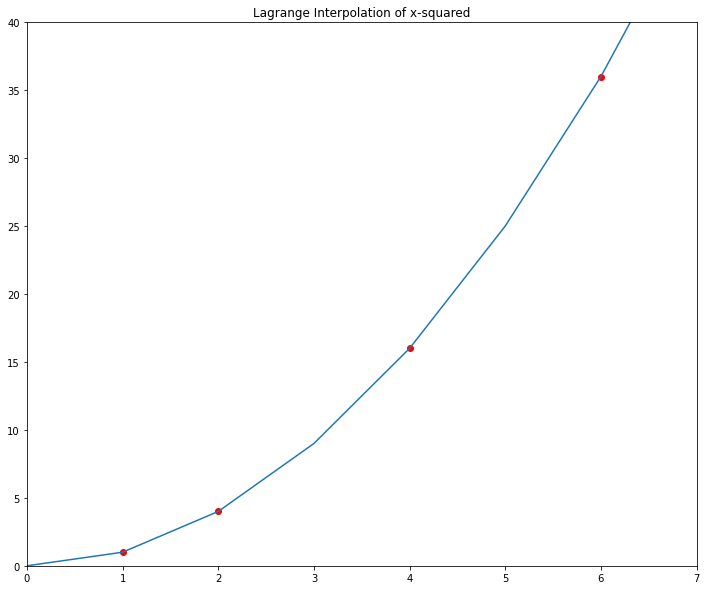

SciPy's Lagrange Interpolation of x = 3 is 9.0 and x = 2.5 is 6.25


In [23]:
import numpy.polynomial.polynomial as poly

lagrange_interpolation = scipy.interpolate.lagrange([2, 4, 6], [4, 16, 36])

plt.figure(figsize=(12,10))
plt.plot([1,2,4,6],[1,4,16,36],'ro')
plt.plot([0, 1, 2, 3, 4, 5, 6, 7], lagrange_interpolation([0, 1, 2, 3, 4, 5, 6, 7]))
plt.xlim(0,7)
plt.ylim(0,40)
plt.title('Lagrange Interpolation of x-squared')
plt.show()
li = lagrange_interpolation(3)
li2 = lagrange_interpolation(2.5)
print(f"SciPy\'s Lagrange Interpolation of x = 3 is {li} and x = 2.5 is {li2}")

However, SciPy's Lagrange method is only useful with few data points. If we input more data points we will run into something like this:

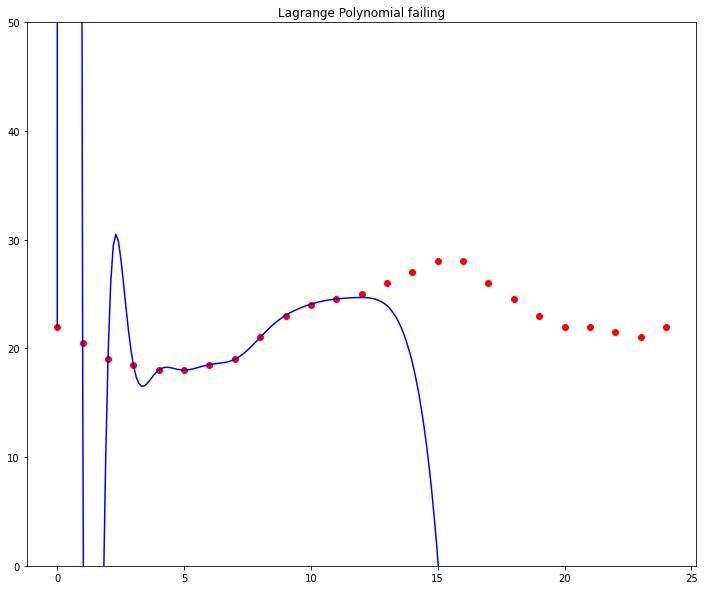

In [33]:
# Compute the lagrange polynomial using scipy
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
y = [22, 20.5, 19, 18.5, 18, 18, 18.5, 19, 21, 23, 24, 24.5, 25, 26, 27, 28, 28, 26, 24.5, 23, 22, 22, 21.5, 21, 22]
lagrange_interpolation = scipy.interpolate.lagrange(x, y)
in_between_hours_scale = np.linspace(0, 24, 24*10)

# Plot the Lagrange Polynomial against the original data
plt.figure(figsize=(12,10))
plt.ylim(0, 50)
plt.scatter(x,y, color = 'red')
plt.plot(in_between_hours_scale, lagrange_interpolation(in_between_hours_scale), 'blue')
plt.title('Lagrange Polynomial failing')
plt.show()

### **17.5 Newton's Polynomial Interpolation**

Newton's polynomial interpolation is another way to find a polynomial that fits a set of data points. The equation is: $$f(x) = \Sigma_{i=0}^n a_in_i(x)$$

with $a_i$ being a coefficient and $n_i(x) = \Pi_{j=o}^{i-1} (x-x_j)$.

Since the polynomial goes through each data point, for points $(x_i,y_i)$ we have $f(x_i)=y_i$ so $f(x_0)=a_0=y_0$ and $f(x_1) = a_0 + a_1(x_1-x_0)=y_1$. So $a_1 = \frac{y_1-y_0}{x_1-x_0}$ and so forth.

SciPy doesn't have a Newton Polynomial Interpolation method, so we must build one.

In [35]:
# Credits to stack overflow for this code

def _poly_newton_coefficient(x, y):    
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p

We will see that it doesn't fail when having too many data points.

Text(0.5, 1.0, 'Newton Polynomial Interpolation')

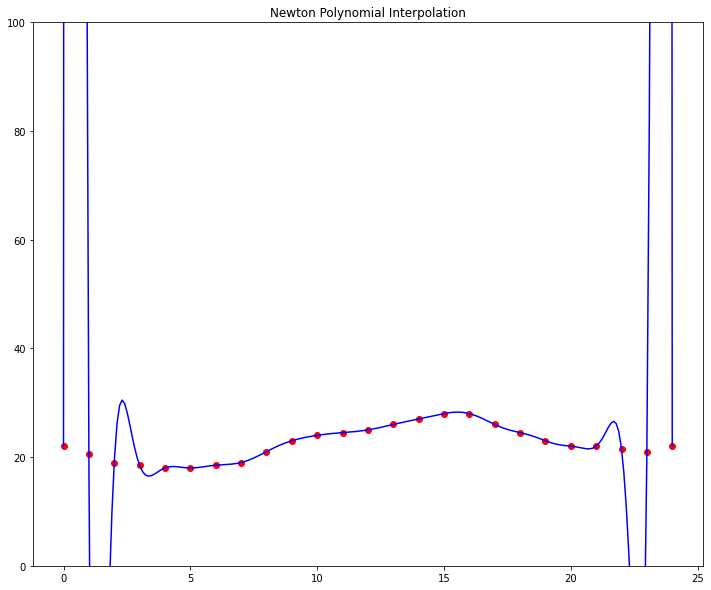

In [37]:
newton_interpolation = newton_polynomial(x, y, in_between_hours_scale)

plt.figure(figsize=(12,10))
plt.scatter(x, y, color = 'red')
plt.plot(in_between_hours_scale, newton_interpolation, 'blue')
plt.ylim(0, 100)
plt.title('Newton Polynomial Interpolation')

Newton's interpolation successfully passes through every data point; however, we see with this graph that there are extreme flucuations to our line between the $1st$ and $2nd$ points as well as a few others, and the line is probably incorrect during these intervals.